# Exploration des données statsbomb

## Introduction

In [4]:
import json
import matplotlib.pyplot as plt
import requests

In [5]:
from kloppy import datasets, to_pandas
from kloppy.infra.datasets.core import loading
from mplsoccer.pitch import Pitch

In [6]:
PROVIDER = "statsbomb"

## Tutoriel

Voir https://kloppy.pysport.org/quickstart/examples/.

In [7]:
dataset = datasets.load(PROVIDER, options={"event_types": ["pass"]})

/home/rdelhome/.virtualenvs/qfoot/lib/python3.8/site-packages/kloppy/infra/datasets/event/statsbomb.py:11: UserWarning: 

You are about to use StatsBomb public data.
By using this data, you are agreeing to the user agreement. 
The user agreement can be found here: https://github.com/statsbomb/open-data/blob/master/LICENSE.pdf

  warnings.warn(


In [8]:
home_team, away_team = dataset.metadata.teams

In [9]:
player = home_team.players[9]

In [10]:
events = [e for e in dataset.events if e.player == player]

In [11]:
player_events = to_pandas(events)

In [12]:
pitch = Pitch(pitch_color="grass", line_color="white", stripe=True, pitch_type=PROVIDER)

/home/rdelhome/.virtualenvs/qfoot/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


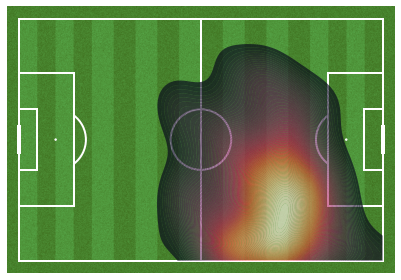

In [64]:
fig, ax = pitch.draw()
plot = pitch.kdeplot(
    player_events["coordinates_x"],
    player_events["coordinates_y"],
    ax=ax,
    shade=True,
    thresh=0.05,
    alpha=0.67,
    linestyles=None,
    cmap="rocket",
    antialiased=True,
    n_levels=80
)

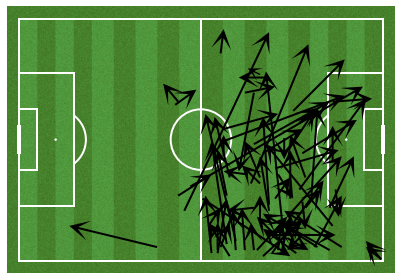

In [62]:
fig, ax = pitch.draw()
plot = pitch.arrows(
    player_events["coordinates_x"],
    player_events["coordinates_y"],
    player_events["end_coordinates_x"],
    player_events["end_coordinates_y"],
    width=2, headwidth=10, headlength=10, 
    ax=ax,
)

## Aller plus loin

In [31]:
datasets.load?

In [15]:
print(home_team, "-", away_team)

Barcelona - Deportivo Alavés


In [17]:
[f"{player} ({player.jersey_no})" for player in home_team.players]

['Malcom Filipe Silva de Oliveira (14)',
 'Philippe Coutinho Correia (7)',
 'Sergio Busquets i Burgos (5)',
 'Jordi Alba Ramos (18)',
 'Gerard Piqué Bernabéu (3)',
 'Luis Alberto Suárez Díaz (9)',
 'Ivan Rakitić (4)',
 'Ousmane Dembélé (11)',
 'Samuel Yves Umtiti (23)',
 'Lionel Andrés Messi Cuccittini (10)',
 'Nélson Cabral Semedo (2)',
 'Sergi Roberto Carnicer (20)',
 'Clément Lenglet (15)',
 'Rafael Alcântara do Nascimento (12)',
 'Arturo Erasmo Vidal Pardo (22)',
 'Jasper Cillessen (13)',
 'Arthur Henrique Ramos de Oliveira Melo (8)',
 'Marc-André ter Stegen (1)']

In [18]:
[f"{player} ({player.jersey_no})" for player in away_team.players]

['Borja González Tomás (18)',
 'Jonathan Rodríguez Menéndez (23)',
 'Rubén Duarte Sánchez (3)',
 'Rubén Sobrino Pozuelo (7)',
 'Víctor Laguardia Cisneros (5)',
 'Ibai Gómez Pérez (11)',
 'Martín Aguirregabiria Padilla (21)',
 'Jorge Franco Alviz (14)',
 'Mubarak Wakaso (22)',
 'Fernando Pacheco Flores (1)',
 'Manuel Alejandro García Sánchez (19)',
 'Daniel Alejandro Torres Rojas (16)',
 'Guillermo Alfonso Maripán Loaysa (6)',
 'Joaquín Navarro Jiménez (15)',
 'Adrián Marín Gómez (17)',
 'Antonio Sivera Salvá (13)',
 'Patrick Twumasi (24)']

### Télécharger des ressources depuis le Github de Statsbomb

Voir https://github.com/statsbomb/open-data

Pour télécharger des fichiers depuis l'API de Github : https://raw.githubusercontent.com/user/project/branch/path-to-files

In [24]:
competition_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/competitions.json"

#### Code brut

In [27]:
with requests.get(competition_url, stream=True) as r:
    r.raise_for_status()
    with open("competition.json", "wb") as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

#### API de Kloppy

Version "à la mano", en récupérant le fichier:

In [28]:
loading.download_file(competition_url, "competition.json")

Version API:

In [29]:
dataset = datasets.load(PROVIDER, options={"event_types": ["pass"]}, match_id=15973)

/home/rdelhome/.virtualenvs/qfoot/lib/python3.8/site-packages/kloppy/infra/datasets/event/statsbomb.py:11: UserWarning: 

You are about to use StatsBomb public data.
By using this data, you are agreeing to the user agreement. 
The user agreement can be found here: https://github.com/statsbomb/open-data/blob/master/LICENSE.pdf

  warnings.warn(


In [23]:
print(dataset.metadata.teams[0], dataset.metadata.teams[1])

Barcelona Huesca


#### Et voilà !

In [32]:
with open("competition.json", "rb") as f:
    competitions = json.load(f)

In [33]:
competitions[0]

{'competition_id': 16,
 'season_id': 4,
 'country_name': 'Europe',
 'competition_name': 'Champions League',
 'competition_gender': 'male',
 'season_name': '2018/2019',
 'match_updated': '2020-10-25T12:33:27.855343',
 'match_available': '2020-10-25T12:33:27.855343'}

In [34]:
[(c["competition_id"], c["competition_name"], c["season_id"]) for c in competitions]

[(16, 'Champions League', 4),
 (16, 'Champions League', 1),
 (16, 'Champions League', 2),
 (16, 'Champions League', 27),
 (16, 'Champions League', 26),
 (16, 'Champions League', 25),
 (16, 'Champions League', 24),
 (16, 'Champions League', 23),
 (16, 'Champions League', 22),
 (16, 'Champions League', 21),
 (16, 'Champions League', 41),
 (16, 'Champions League', 39),
 (16, 'Champions League', 37),
 (16, 'Champions League', 44),
 (16, 'Champions League', 76),
 (37, "FA Women's Super League", 42),
 (37, "FA Women's Super League", 4),
 (43, 'FIFA World Cup', 3),
 (11, 'La Liga', 42),
 (11, 'La Liga', 4),
 (11, 'La Liga', 1),
 (11, 'La Liga', 2),
 (11, 'La Liga', 27),
 (11, 'La Liga', 26),
 (11, 'La Liga', 25),
 (11, 'La Liga', 24),
 (11, 'La Liga', 23),
 (11, 'La Liga', 22),
 (11, 'La Liga', 21),
 (11, 'La Liga', 41),
 (11, 'La Liga', 40),
 (11, 'La Liga', 39),
 (11, 'La Liga', 38),
 (11, 'La Liga', 37),
 (49, 'NWSL', 3),
 (2, 'Premier League', 44),
 (72, "Women's World Cup", 30)]

### Récupérer les matchs

In [35]:
competition_id = competitions[0]["competition_id"]
season_id = competitions[0]["season_id"]

In [36]:
match_url = f"https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/{competition_id}/{season_id}.json"

In [37]:
loading.download_file(match_url, "match.json")

In [38]:
with open("match.json", "rb") as f:
    match = json.load(f)

In [39]:
match[0]

{'match_id': 22912,
 'match_date': '2019-06-01',
 'kick_off': '21:00:00.000',
 'competition': {'competition_id': 16,
  'country_name': 'Europe',
  'competition_name': 'Champions League'},
 'season': {'season_id': 4, 'season_name': '2018/2019'},
 'home_team': {'home_team_id': 38,
  'home_team_name': 'Tottenham Hotspur',
  'home_team_gender': 'male',
  'home_team_group': None,
  'country': {'id': 68, 'name': 'England'},
  'managers': [{'id': 81,
    'name': 'Mauricio Roberto Pochettino Trossero',
    'nickname': 'Mauricio Pochettino',
    'dob': None,
    'country': {'id': 11, 'name': 'Argentina'}}]},
 'away_team': {'away_team_id': 24,
  'away_team_name': 'Liverpool',
  'away_team_gender': 'male',
  'away_team_group': None,
  'country': {'id': 68, 'name': 'England'},
  'managers': [{'id': 94,
    'name': 'Jürgen Klopp',
    'nickname': None,
    'dob': None,
    'country': {'id': 85, 'name': 'Germany'}}]},
 'home_score': 0,
 'away_score': 2,
 'match_status': 'available',
 'last_updated':

### Gourmandise ultime : récupérer les évènements d'un match en particulier

In [40]:
match_id = match[0]["match_id"]

In [42]:
match_id

22912

In [43]:
events_url = f"https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/{match_id}.json"

In [44]:
loading.download_file(events_url, "events.json")
with open("events.json", "rb") as f:
    events = json.load(f)

In [45]:
events[0]

{'id': 'c4341845-358d-43e7-9af4-9a39aa1d90f1',
 'index': 1,
 'period': 1,
 'timestamp': '00:00:00.000',
 'minute': 0,
 'second': 0,
 'type': {'id': 35, 'name': 'Starting XI'},
 'possession': 1,
 'possession_team': {'id': 38, 'name': 'Tottenham Hotspur'},
 'play_pattern': {'id': 1, 'name': 'Regular Play'},
 'team': {'id': 38, 'name': 'Tottenham Hotspur'},
 'duration': 0.0,
 'tactics': {'formation': 4231,
  'lineup': [{'player': {'id': 3099, 'name': 'Hugo Lloris'},
    'position': {'id': 1, 'name': 'Goalkeeper'},
    'jersey_number': 1},
   {'player': {'id': 3308, 'name': 'Kieran Trippier'},
    'position': {'id': 2, 'name': 'Right Back'},
    'jersey_number': 2},
   {'player': {'id': 20005, 'name': 'Toby Alderweireld'},
    'position': {'id': 3, 'name': 'Right Center Back'},
    'jersey_number': 4},
   {'player': {'id': 3077, 'name': 'Jan Vertonghen'},
    'position': {'id': 5, 'name': 'Left Center Back'},
    'jersey_number': 5},
   {'player': {'id': 3594, 'name': 'Danny Rose'},
    'p

In [46]:
import pandas as pd

In [48]:
pd.Series([e["type"]["name"] for e in events]).value_counts()

Pass                 890
Ball Receipt*        846
Carry                669
Pressure             314
Ball Recovery        100
Duel                  56
Clearance             51
Goal Keeper           38
Shot                  30
Block                 25
Miscontrol            22
Dispossessed          19
Interception          15
Dribble               15
Foul Committed        15
Foul Won              12
Dribbled Past         10
50/50                  6
Substitution           6
Shield                 5
Injury Stoppage        4
Half End               4
Tactical Shift         4
Half Start             4
Starting XI            2
Referee Ball-Drop      2
Offside                1
dtype: int64

### Putting it together

In [49]:
match[0]

{'match_id': 22912,
 'match_date': '2019-06-01',
 'kick_off': '21:00:00.000',
 'competition': {'competition_id': 16,
  'country_name': 'Europe',
  'competition_name': 'Champions League'},
 'season': {'season_id': 4, 'season_name': '2018/2019'},
 'home_team': {'home_team_id': 38,
  'home_team_name': 'Tottenham Hotspur',
  'home_team_gender': 'male',
  'home_team_group': None,
  'country': {'id': 68, 'name': 'England'},
  'managers': [{'id': 81,
    'name': 'Mauricio Roberto Pochettino Trossero',
    'nickname': 'Mauricio Pochettino',
    'dob': None,
    'country': {'id': 11, 'name': 'Argentina'}}]},
 'away_team': {'away_team_id': 24,
  'away_team_name': 'Liverpool',
  'away_team_gender': 'male',
  'away_team_group': None,
  'country': {'id': 68, 'name': 'England'},
  'managers': [{'id': 94,
    'name': 'Jürgen Klopp',
    'nickname': None,
    'dob': None,
    'country': {'id': 85, 'name': 'Germany'}}]},
 'home_score': 0,
 'away_score': 2,
 'match_status': 'available',
 'last_updated':

In [55]:
lineups_url = f"https://raw.githubusercontent.com/statsbomb/open-data/master/data/lineups/{match_id}.json"

In [56]:
loading.download_file(lineups_url, "lineups.json")
with open("lineups.json", "rb") as f:
    lineups = json.load(f)

In [57]:
lineups[0]

{'team_id': 38,
 'team_name': 'Tottenham Hotspur',
 'lineup': [{'player_id': 3043,
   'player_name': 'Christian Dannemann Eriksen',
   'player_nickname': 'Christian Eriksen',
   'jersey_number': 23,
   'country': {'id': 61, 'name': 'Denmark'}},
  {'player_id': 3077,
   'player_name': 'Jan Vertonghen',
   'player_nickname': None,
   'jersey_number': 5,
   'country': {'id': 22, 'name': 'Belgium'}},
  {'player_id': 3082,
   'player_name': 'Harry Winks',
   'player_nickname': None,
   'jersey_number': 8,
   'country': {'id': 68, 'name': 'England'}},
  {'player_id': 3083,
   'player_name': 'Heung-Min Son',
   'player_nickname': 'Son Heung-Min',
   'jersey_number': 7,
   'country': {'id': 121, 'name': 'Korea\xa0(South)'}},
  {'player_id': 3091,
   'player_name': 'Moussa Sissoko',
   'player_nickname': None,
   'jersey_number': 17,
   'country': {'id': 78, 'name': 'France'}},
  {'player_id': 3094,
   'player_name': 'Bamidele Alli',
   'player_nickname': 'Dele Alli',
   'jersey_number': 20,
  